#### Alexandre Caldeira - 01/08 - 17:00
# Replicando MCSim detector baseado na média
* Referência: Aula por Tiago Zanotelli 
  *  [(Aula 3 - Parte 2) Desempenho do Detector](https://www.youtube.com/watch?v=7NWdcApuj_Q&list=PL5sWwW5qk6kIunvb-TH0D4JCPBpGI-oXY&index=10)

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling


In [203]:
nSim = 5*10**4

amostras = 10

energiaRuido = 1

alpha = 5/100

ruido = energiaRuido*rd.randn(amostras,nSim)

limiar = np.quantile(np.mean(ruido,axis=0), 1-alpha)
print('Limiar:', limiar)

sinal = np.zeros((amostras,nSim))
sinalMedio = np.zeros((nSim,))

listaSNRs = np.arange(-50,30,1)
probDetec = np.zeros((len(listaSNRs),1))

# for i, SNRi in enumerate(listaSNRs):
#     amplitude = 10**((SNRi/20)*(energiaRuido^2))

#     for sim in range(0,nSim):
#         x = energiaRuido*rd.randn(amostras,1) + amplitude
#         xMedio = np.mean(x,axis = 1)
    
#     probDetec[i] = np.mean(xMedio>limiar)

for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**(SNRi/20)*(energiaRuido^2)
    
    sinal = ruido + amplitude
    sinalMedio = np.mean(sinal,axis = 1)

    probDetec[i] = np.mean(sinalMedio>limiar)

print('Done')

Limiar: 0.5192699271340461
Done


In [204]:
# fig,ax = plt.subplots()
# sns.histplot(x= ruido, kde= True,ax=fig.axes[0],color='tab:orange')  
# sns.histplot(x= sinal, kde= True,ax=fig.axes[0])
# plt.axvline(limiar, 0,1,c='r',linestyle='--')
# fig.axes[0].set_title('Visualizando limiar')
# plt.legend(['Sinal','Ruído','Limiar'])

# plt.show()

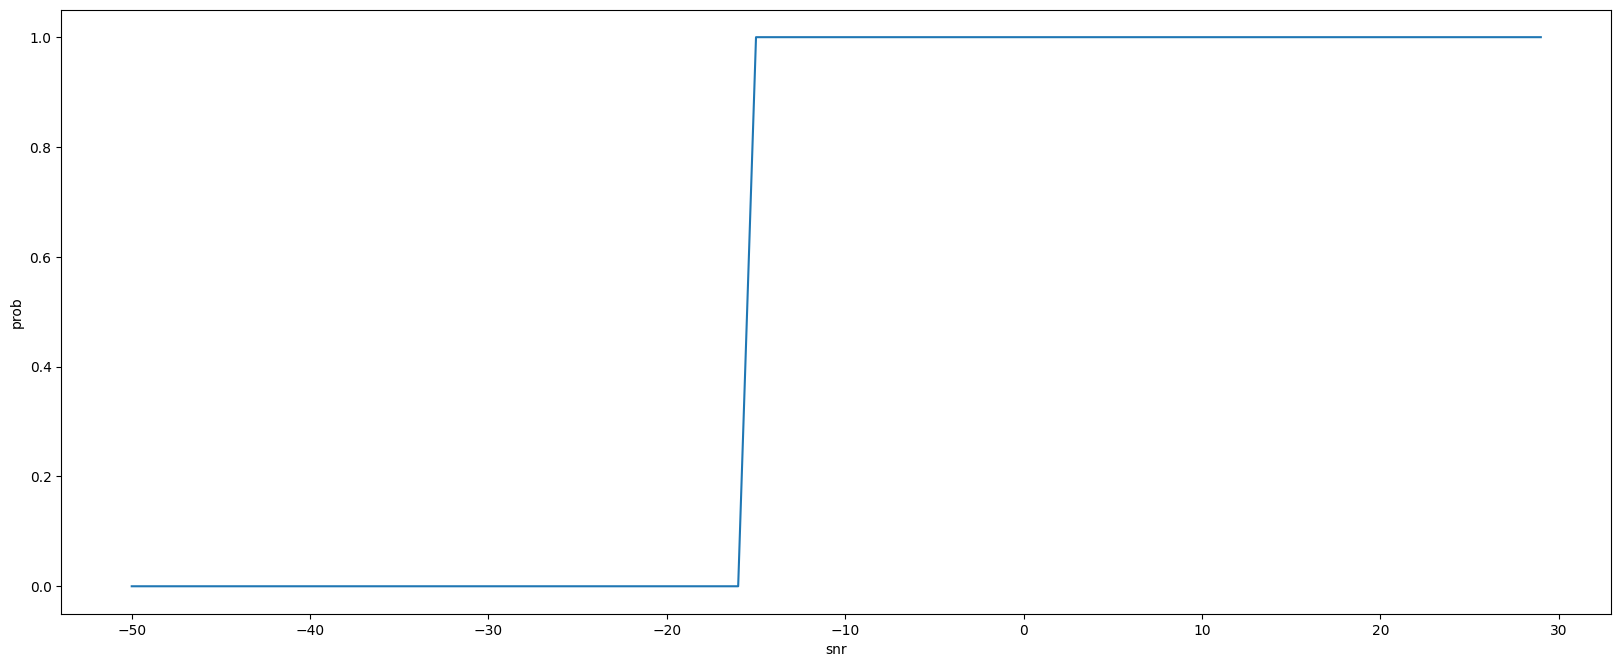

In [205]:
pD = pd.DataFrame({'snr': listaSNRs,'prob':probDetec[:,0]})
sns.lineplot(data = pD,x='snr',y='prob');